In [ ]:
#Imorting Libraries

In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

In [22]:
# Load the dataset
df = pd.read_csv('reviews.csv')
print(df.head())


                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  thumbsUpCount  \
0  I have the same recurring tasks to do every da...             11   
1  Instead of shopping around, I downloaded Any.d...              8   
2  Why does every once in a while... out of the b...              6   
3  Terrible Update! This app u

In [25]:
# Initialize stopwords, stemmer, and lemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        
        # Remove links
        text = re.sub(r'http\S+|www\S+', '', text)
        
        # Remove newline characters
        text = re.sub(r'\n', ' ', text)
        
        # Remove words containing numbers
        text = re.sub(r'\w*\d\w*', '', text)
        
        # Remove special characters and extra spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Tokenization
        tokens = word_tokenize(text)
        
        # Remove stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]
        
        # Stemming
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
        
        # Lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
        
        # Join tokens back into text
        processed_text = ' '.join(lemmatized_tokens)
        
        return processed_text
    else:
        # If the value is not a string, return an empty string or handle as per your requirement
        return ''


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\masne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Apply preprocessing to the 'content' column
df['clean_content'] = df['content'].apply(preprocess_text)
# Display the cleaned content
print(df[['content', 'clean_content']].head())

                                             content  \
0  I have the same recurring tasks to do every da...   
1  Instead of shopping around, I downloaded Any.d...   
2  Why does every once in a while... out of the b...   
3  Terrible Update! This app used to be perfect f...   
4  This app is deceivingly terrible. There are so...   

                                       clean_content  
0  recur task everi day need todolist remind buzz...  
1  instead shop around download anydo wide use se...  
2  everi blue app ask updat acct email everyth ta...  
3  terribl updat app use perfect plan certain tas...  
4  app deceivingli terribl realli nice design fea...  


In [32]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/300.2 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 151.3 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 252.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 231.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 328.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 328.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 328.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 328.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2

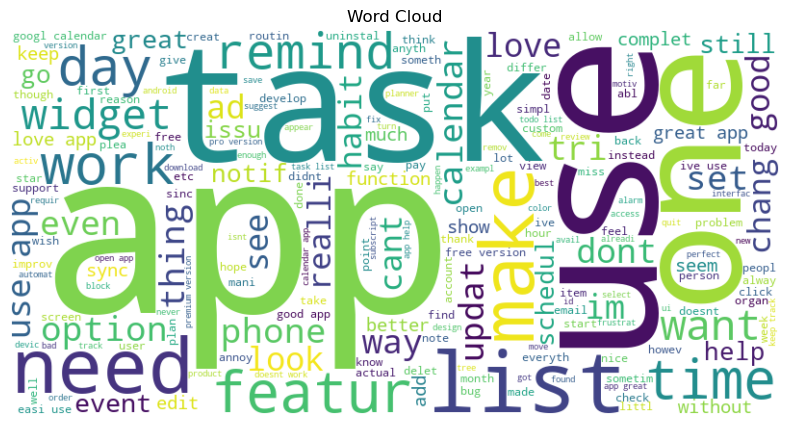

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
